In [1]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
from collections import Counter

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
pyo.init_notebook_mode()
import plotly.figure_factory as ff
import missingno as msno

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV, RepeatedStratifiedKFold

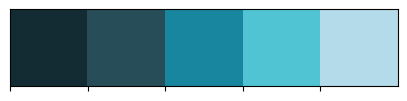

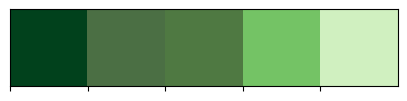

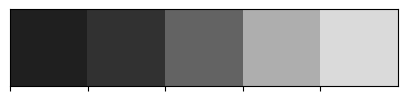

In [2]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
sns.palplot(colors_blue)
sns.palplot(colors_green)
sns.palplot(colors_dark)

# palplot is to plot the colors palette

In [3]:
df = pd.read_csv('water_potability.csv')
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [4]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.describe

<bound method NDFrame.describe of             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.9631

In [7]:
df.Hardness[df.Hardness=='Nan'].sum()

0.0

In [8]:
df.shape

(3276, 10)

## Visualization

In [9]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [10]:
pot = pd.DataFrame(df.Potability.value_counts())
pot

count
Potability       
0            1998
1            1278

In [11]:
## make a pie chart
fig = px.pie(pot, values='count', names=['Not Potable','Potable'], hole=0.4, opacity=0.6, color_discrete_sequence=[colors_green[3], colors_blue[3]])


fig.add_annotation(text='We can resample the data<br> to get a balanced dataset',
                   x=1.2,y=0.9,showarrow=False,font_size=12,opacity=0.7,font_family='monospace')
fig.add_annotation(text='Potability',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Q/ How many samples of water are Potable?', x=0.47, y=0.98, font=dict(color=colors_dark[2], size=20)),
    legend=dict(x=0.37, y=-0.05, orientation='h', traceorder='reversed'),  hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

Now check the distribution of the features

### Hardness

Hardenss of water: The simple definition of water hardness is the amount of dissolved calcium and magnesium in the water. Hard water is high in dissolved minerals, largely calcium and magnesium. You may have felt the effects of hard water, literally, the last time you washed your hands. Depending on the hardness of your water, after using soap to wash you may have felt like there was a film of residue left on your hands. In hard water, soap reacts with the calcium (which is relatively high in hard water) to form "soap scum". When using hard water, more soap or detergent is needed to get things clean, be it your hands, hair, or your laundry.

In [12]:
# Hardness distribution

hard = df[df['Hardness']>=76]['Hardness'].value_counts().sum()
total = len(df)
hard_percentage = f'{hard/total*100:.1f}'

fig = px.histogram(df, x="Hardness", y=Counter(df['Hardness']), color='Potability', template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=151, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)
fig.add_vline(x=301, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)
fig.add_vline(x=76, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<76 mg/L is<br> considered soft', x=40,y=130,showarrow=False,font_size=9)
fig.add_annotation(text='Between 76 and 150<br> (mg/L) is<br>moderately hard',x=113,y=130,showarrow=False,font_size=9)
fig.add_annotation(text='Between 151 and 300 (mg/L)<br> is considered hard',x=250,y=130,showarrow=False,font_size=9)
fig.add_annotation(text='>300 mg/L is<br> considered very hard',x=340,y=130,showarrow=False,font_size=9)
fig.add_annotation(text=f'{hard_percentage}% of the water is considered hard', x=325, y=75, showarrow=False,font_size=12, bordercolor='black', borderwidth=1, bgcolor=colors_dark[4])

fig.update_layout(font_family='monospace', title=dict(text='Hardness Distribution', x=0.53,y=0.95, font=dict(color=colors_dark[2], size=20)),
                 xaxis_title_text='Hardness (mg/L)',
                 yaxis_title_text='Count',
                 legend=dict(x=1, y=0.96, bordercolor=colors_dark[4], borderwidth=0, tracegroupgap=5),
                 bargap=0.3)

fig.show()

In [13]:
hard = df[df['Hardness']>=76]['Hardness'].value_counts().sum()
total = len(df)
hard/total

0.9993894993894994

99.9% of the water is hard

### pH level

The pH of water is a measure of the acid–base equilibrium and, in most natural waters, is controlled by the carbon dioxide–bicarbonate–carbonate equilibrium system. An increased carbon dioxide concentration will therefore lower pH, whereas a decrease will cause it to rise. Temperature will also affect the equilibria and the pH. In pure water, a decrease in pH of about 0.45 occurs as the temperature is raised by 25 °C. In water with a buffering capacity imparted by bicarbonate, carbonate and hydroxyl ions, this temperature effect is modified (APHA, 1989). The pH of most drinking-water lies within the range 6.5–8.5. Natural waters can be of lower pH, as a result of, for example, acid rain or higher pH in limestone areas.

In [14]:
# pH level distribution

ph = df[(df['ph']>=6.5) & (df['ph']<=8.5)]['ph'].value_counts().sum()
total = len(df)
ph_percentage = f'{ph/total*100:.1f}'

fig = px.histogram(df, x="ph", y=Counter(df['ph']), color='Potability', template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=6.5, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)
fig.add_vline(x=8.5, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<6.5 is<br> considered too acid', x=4,y=100,showarrow=False,font_size=9)
fig.add_annotation(text='Between 6.5 and 8.5<br> is good',x=7.5,y=100,showarrow=False,font_size=9)
fig.add_annotation(text='>8.5 considered <br> too alkaline',x=10.5,y=100,showarrow=False,font_size=9)
fig.add_annotation(text=f'{ph_percentage}% of the water is on a good pH level', x=12, y=75, showarrow=False,font_size=12, bordercolor='black', borderwidth=1, bgcolor=colors_dark[4])

fig.update_layout(font_family='monospace', title=dict(text='pH Distribution', x=0.53,y=0.95, font=dict(color=colors_dark[2], size=20)),
                 xaxis_title_text='pH level',
                 yaxis_title_text='Count',
                 legend=dict(x=1, y=0.96, bordercolor=colors_dark[4], borderwidth=0, tracegroupgap=5),
                 bargap=0.3)

fig.show()

### Sulfate distribution

Sulfate (SO4) can be found in almost all natural water. The origin of most sulfate compounds is the oxidation of sulfite ores, the presence of shales, or the industrial wastes. Sulfate is one of the major dissolved components of rain. High concentrations of sulfate in the water we drink can have a laxative effect when combined with calcium and magnesium, the two most common constituents of hardness.

In [15]:
# sulfate distribution

so4 = df[df['Sulfate']<=250]['Sulfate'].value_counts().sum()
total = len(df)
so4_percentage = f'{so4/total*100:.1f}'

fig = px.histogram(df, x="Sulfate", y=Counter(df['Sulfate']), color='Potability', template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=250, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<250 mg/L is considered <br> safe for drinking', x=210,y=90,showarrow=False,font_size=9)
fig.add_annotation(text=f'{so4_percentage}% of the water is <br> sulfate-safe for drinking', x=450, y=75, showarrow=False,font_size=12, bordercolor='black', borderwidth=1, bgcolor=colors_dark[4])

fig.update_layout(font_family='monospace', title=dict(text='Sulfate Distribution', x=0.53,y=0.95, font=dict(color=colors_dark[2], size=20)),
                 xaxis_title_text='Sulfate (mg/L)',
                 yaxis_title_text='Count',
                 legend=dict(x=1, y=0.96, bordercolor=colors_dark[4], borderwidth=0, tracegroupgap=5),
                 bargap=0.3)

fig.show()

### Correlation between each feature

Scatter Plot Matrix helps in finding out the correlation between all the features.

In [16]:
fig = px.scatter_matrix(df, df.drop('Potability', axis=1), height=1250, width=1250, template='plotly_white', opacity=0.7,
                       color='Potability', symbol='Potability', color_continuous_scale=[colors_green[3],colors_blue[3]],
#                        color_discrete_sequence=[colors_blue[3],colors_green[3]]
                       )

fig.update_layout(font_family='monospace',font_size=10,
                  coloraxis_showscale=False,
                 legend=dict(x=0.02,y=1.07,bgcolor=colors_dark[4]),
                 title=dict(text='Scatter Plot Matrix b/w Features',x=0.5,y=0.97,
                   font=dict(color=colors_dark[2],size=24)))
fig.show()

from the scatter plot above, the correlation is minimum. (even no colleration at all)

In [17]:
cor=df.drop('Potability',axis=1).corr()
cor

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
ph                   0.018614        0.043503         0.003354  -0.039057  
Hardness            -0.023915        0.003610        -0.013013  -0.014449  
Solids               0.013831        0.010242        -0.009143   0.019546  
Chloramines         -0.020486       -0.012653         0.017084   0.002363  
Sulfate             -0.016121        0.030831        -0.030274  -0.011187  
Conductivity         1.000000        0.020966         0.001285   0.005798  
Organic_carbon       0.020966        1.000000        -0.013274  -0.027308  
Trihalomethanes      0.001285       -0.013274         1.000000  -0.022145  
Turbidity            0.005798       -0.027308        -0.022145   1.000000

let's make a heatmap to visualize the correlation once again.

In [18]:
fig = px.imshow(cor,height=800,width=800,color_continuous_scale=colors_blue,template='plotly_white')

fig.update_layout(font_family='monospace', title=dict(text='Correlation Heatmap', x=0.5, y=0.93,
                                                     font=dict(color=colors_dark[2], size=24)),
                  coloraxis_colorbar=dict(len=0.85, x=1.1)
                 )

fig.show()

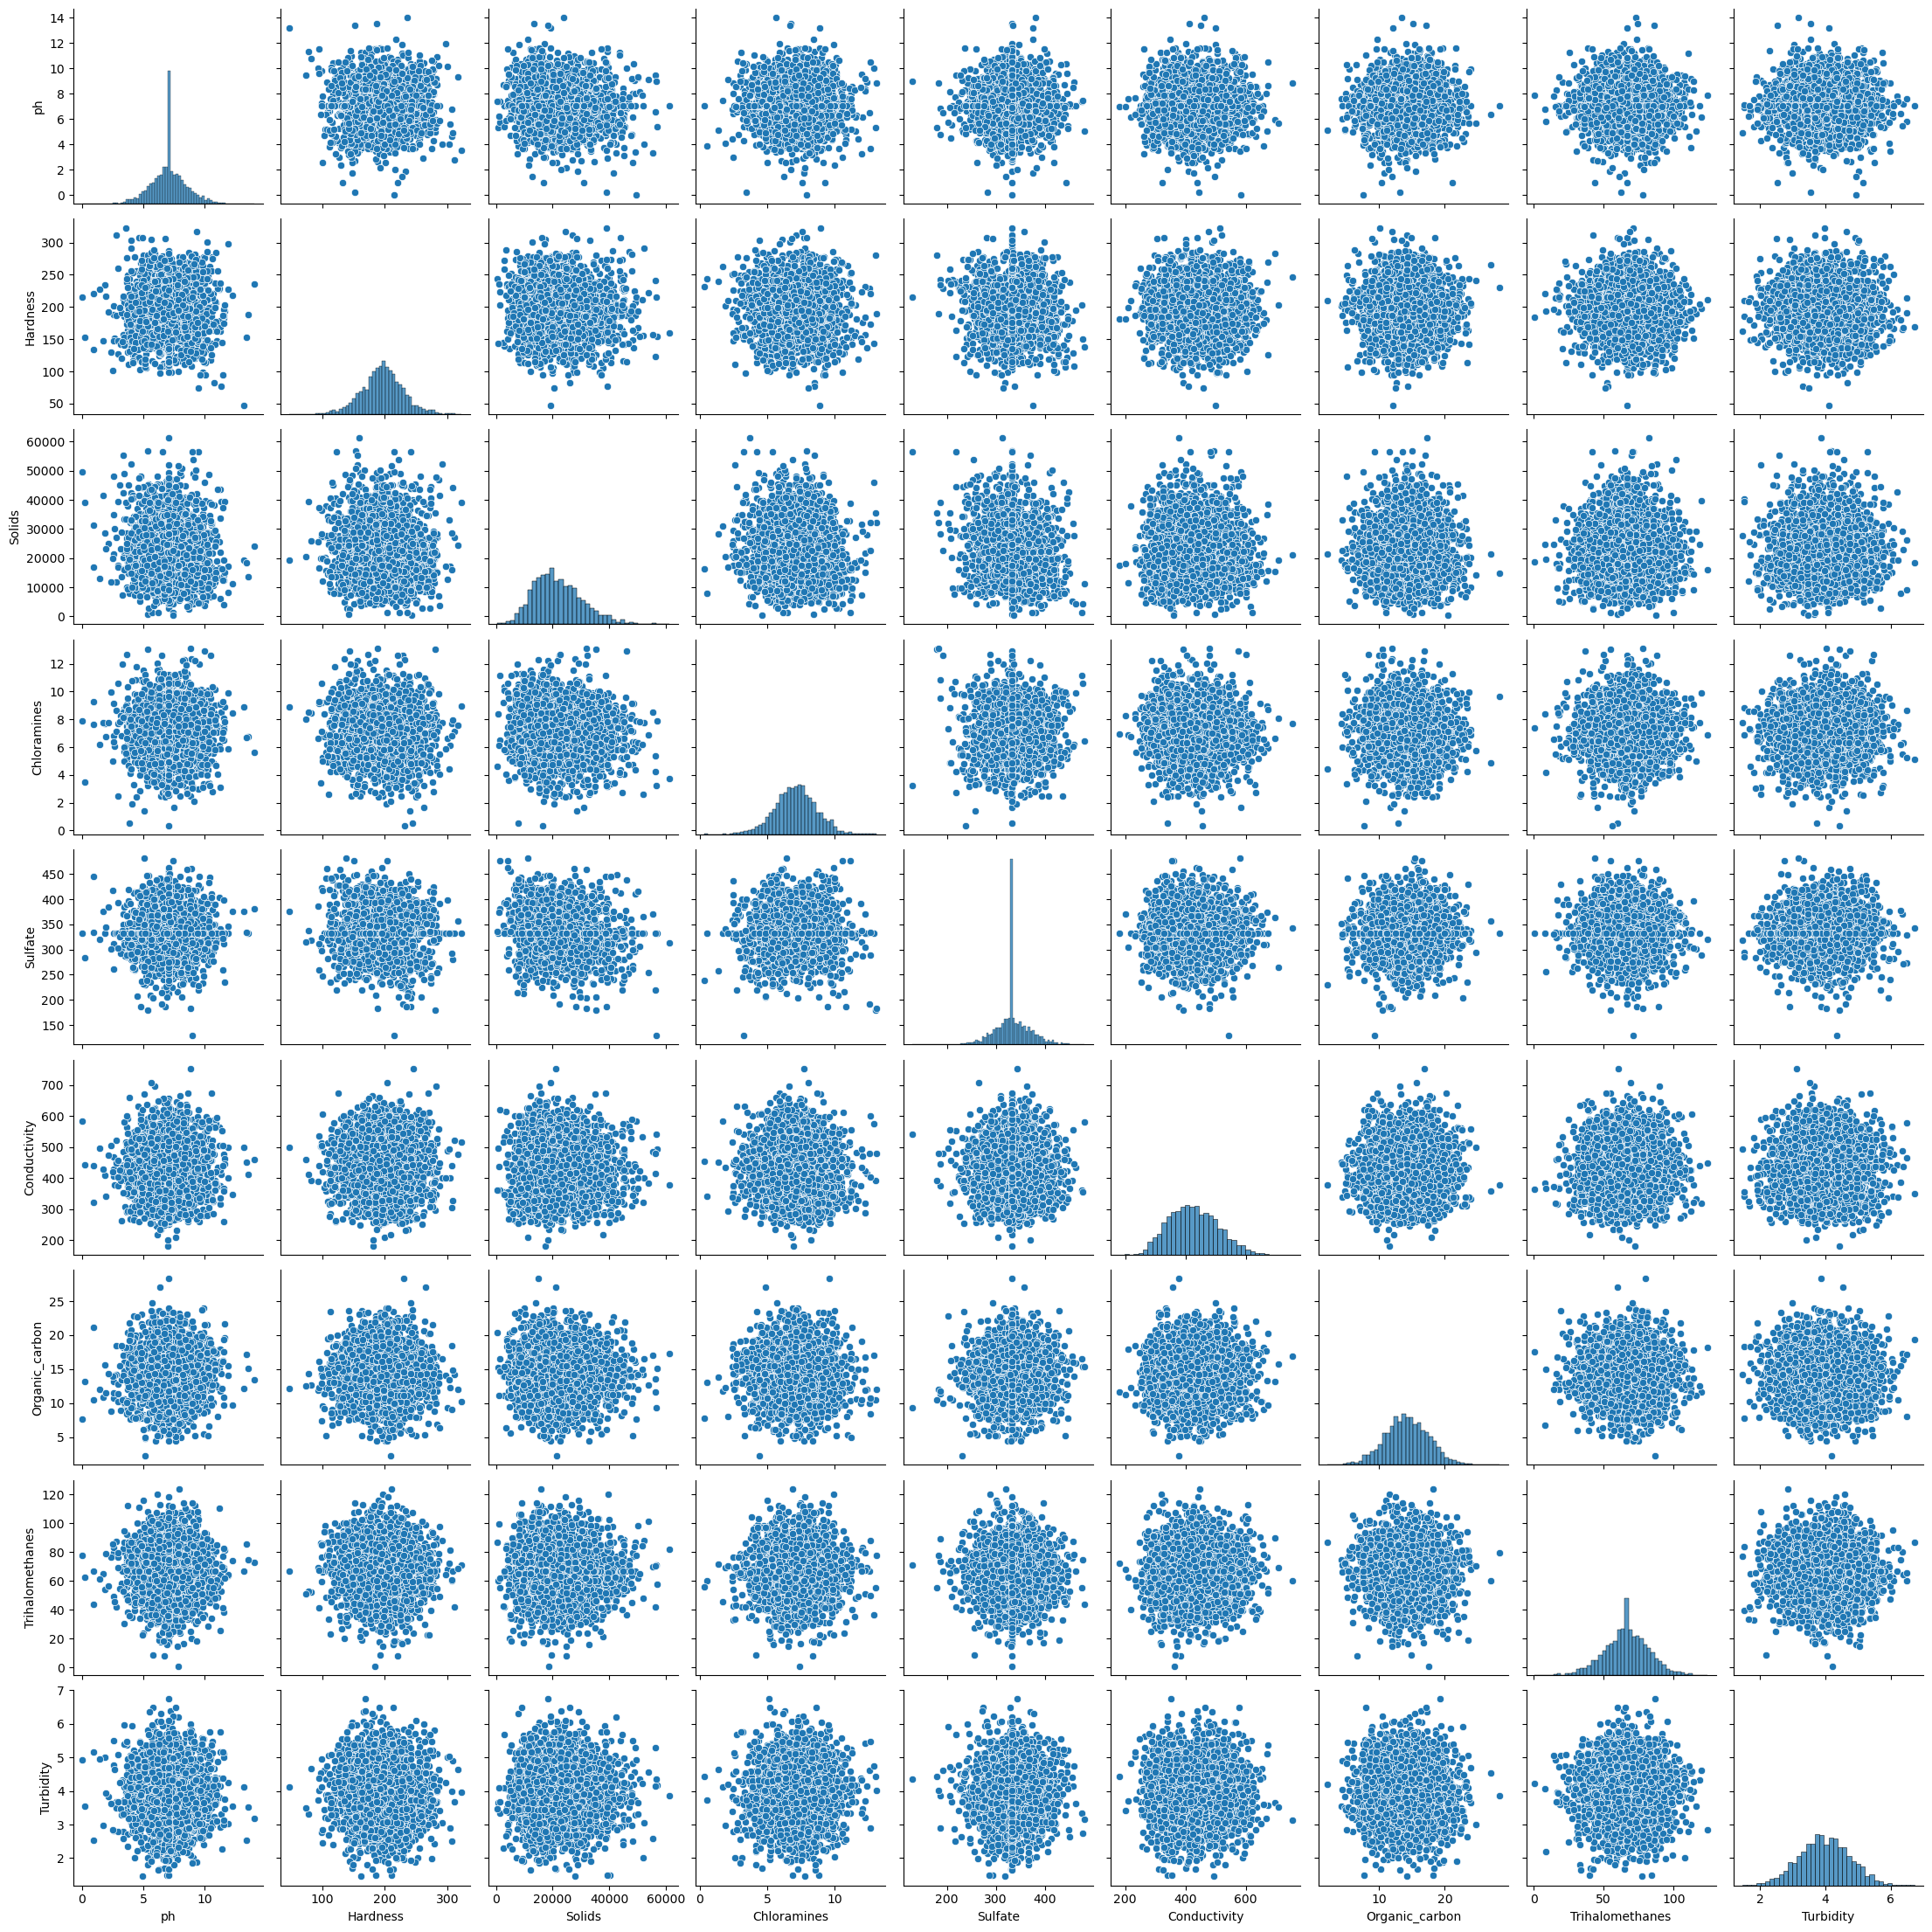

In [39]:
#check for outliers

columns_of_interest = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

sns.pairplot(df[columns_of_interest])
plt.show()

from the table above, there is outliers in Sulfate and Trihalomethanes (?)

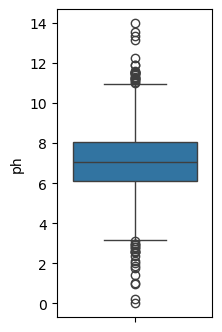

In [22]:
#check for outliers
# fig, axs = plt.subplots(3,3)

def outliers_bp(df,feature):
    plt.figure(figsize=(2, 4))
    sns.boxplot(data=df[feature])
#     plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()
    
outliers_bp(df,'ph')

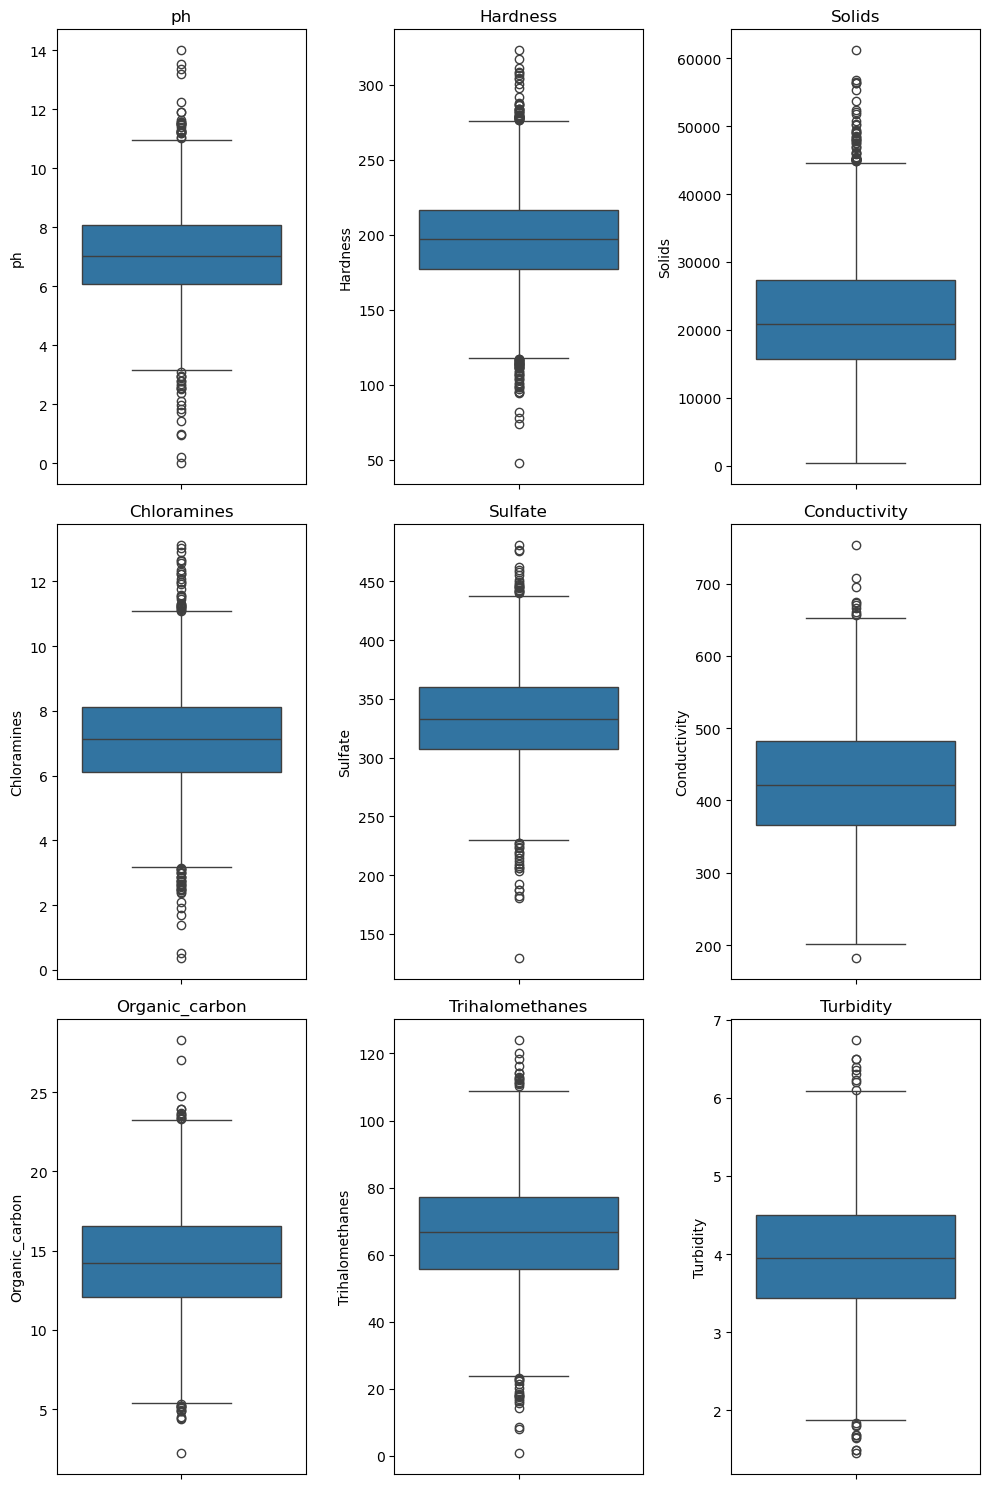

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the data
columns_of_interest = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Create subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 15))

# Flatten the axs array to easily iterate over each subplot
axs = axs.flatten()

# Plot scatter plot or box plot for each column
for i, col in enumerate(columns_of_interest):
    sns.boxplot(data=df, y=col, ax=axs[i])
    axs[i].set_title(col)

# Remove any remaining empty subplots
for ax in axs[len(columns_of_interest):]:
    ax.remove()

plt.tight_layout()
plt.show()


## Data Preparation

### Dealing with missing values

<Axes: >

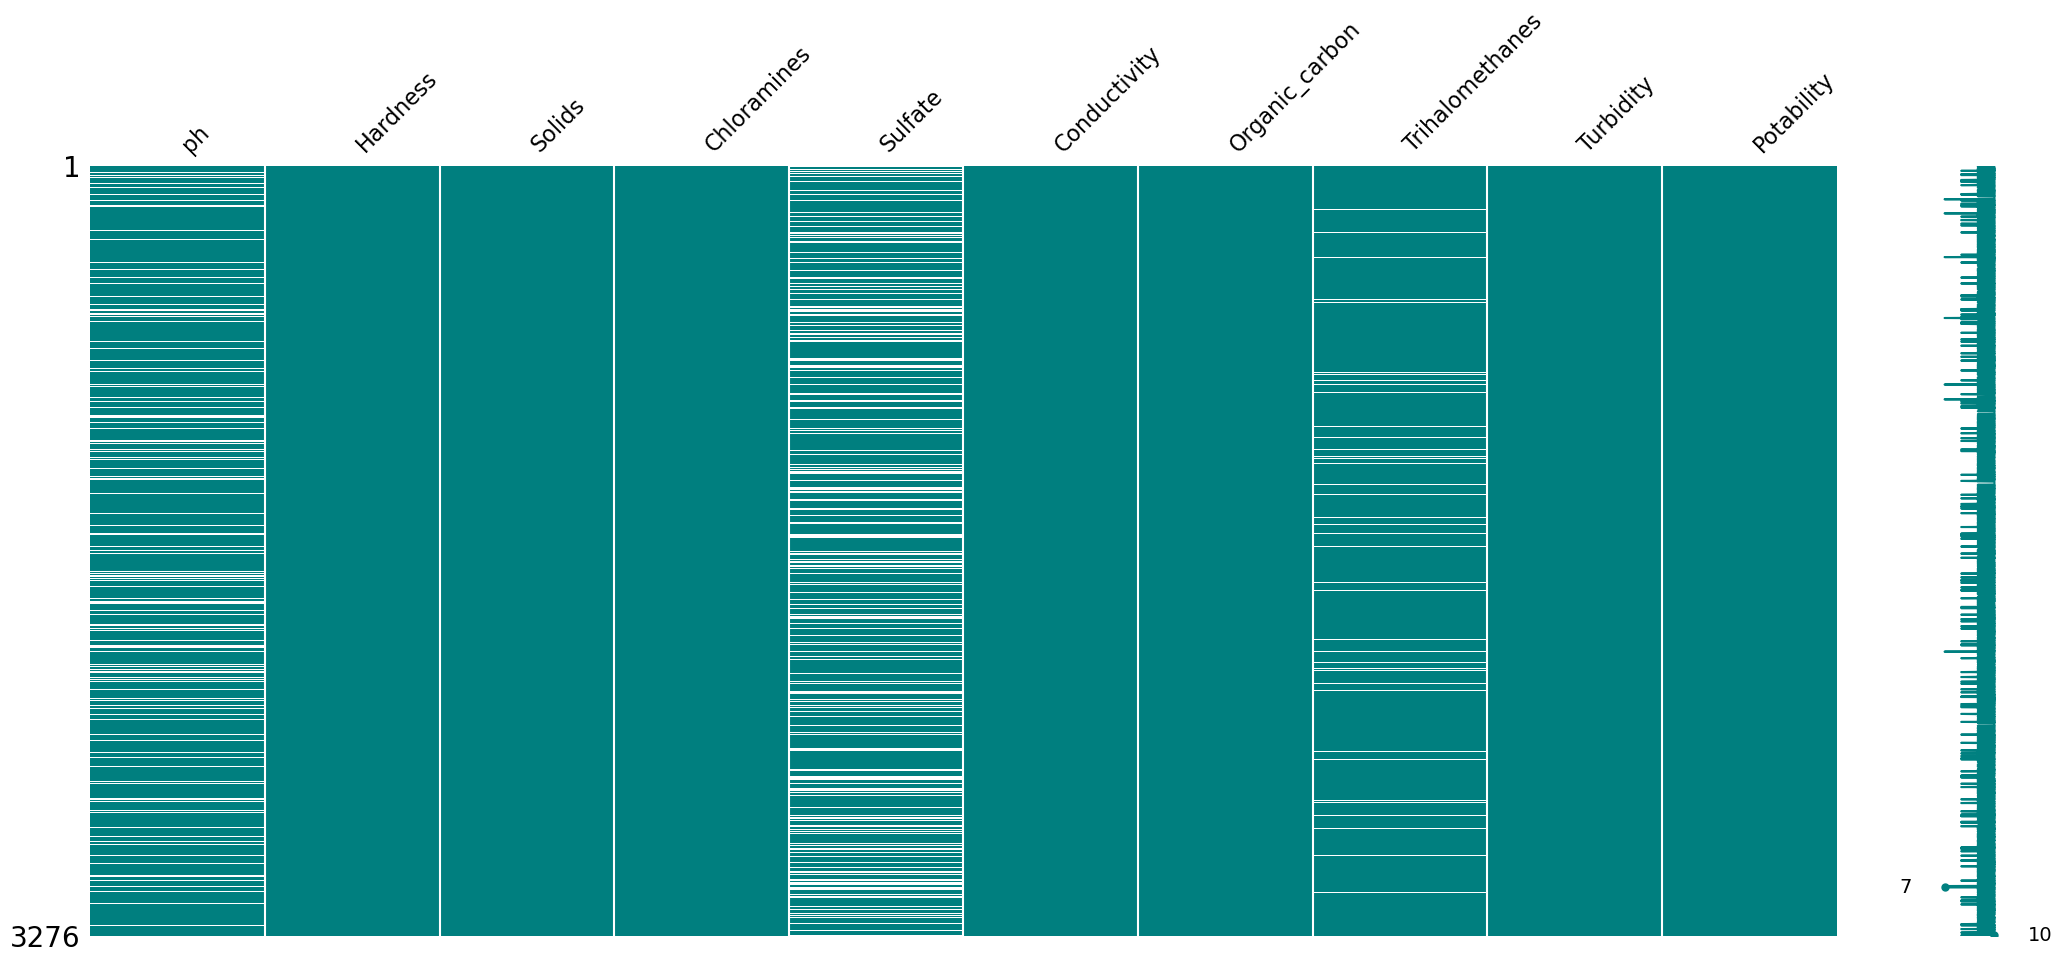

In [24]:
fig = msno.matrix(df, color=(0, 0.5, 0.5))
fig

We can see that the missing values in the dataset are within pH, Sulfate, and Trihalomethanes. Check the number of missing values.

In [25]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [26]:
df[df.Potability==0].describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  1684.000000  1998.000000   1998.000000  1998.000000  1510.000000   
mean      7.085378   196.733292  21777.490788     7.092175   334.564290   
std       1.683499    31.057540   8543.068788     1.501045    36.745549   
min       0.000000    98.452931    320.942611     1.683993   203.444521   
25%       6.037723   177.823265  15663.057382     6.155640   311.264006   
50%       7.035456   197.123423  20809.618280     7.090334   333.389426   
75%       8.155510   216.120687  27006.249009     8.066462   356.853897   
max      14.000000   304.235912  61227.196008    12.653362   460.107069   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1998.000000     1998.000000      1891.000000  1998.000000      1998.0  
mean     426.730454       14.364335        66.303555     3.965800         0.0  
std       80.047317        3.334554        16.079320     0.780282         0.0  
min      181.483754        4.371899         0.738000     1.450000         0.0  
25%      368.498530       12.101057        55.706530     3.444062         0.0  
50%      422.229331       14.293508        66.542198     3.948076         0.0  
75%      480.677198       16.649485        77.277704     4.496106         0.0  
max      753.342620       28.300000       120.030077     6.739000         0.0

In [27]:
df[df.Potability==1].describe()

ph     Hardness        Solids  Chloramines     Sulfate  \
count  1101.000000  1278.000000   1278.000000  1278.000000  985.000000   
mean      7.073783   195.800744  22383.991018     7.169338  332.566990   
std       1.448048    35.547041   9101.010208     1.702988   47.692818   
min       0.227499    47.432000    728.750830     0.352000  129.000000   
25%       6.179312   174.330531  15668.985035     6.094134  300.763772   
50%       7.036752   196.632907  21199.386614     7.215163  331.838167   
75%       7.933068   218.003420  27973.236446     8.199261  365.941346   
max      13.175402   323.124000  56488.672413    13.127000  481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1278.000000     1278.000000      1223.000000  1278.000000      1278.0  
mean     425.383800       14.160893        66.539684     3.968328         1.0  
std       82.048446        3.263907        16.327419     0.780842         0.0  
min      201.619737        2.200000         8.175876     1.492207         1.0  
25%      360.939023       12.033897        56.014249     3.430909         1.0  
50%      420.712729       14.162809        66.678214     3.958576         1.0  
75%      484.155911       16.356245        77.380975     4.509569         1.0  
max      695.369528       23.604298       124.000000     6.494249         1.0

In [28]:
df[df.Potability==0][['ph','Sulfate', 'Trihalomethanes']].median()

ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

In [29]:
df[df.Potability==1][['ph','Sulfate', 'Trihalomethanes']].median()

ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

We can see that the difference between the mean and median values of Potable and Non-Potable Water is minimal, especially for these 3 features. So we use the overall median of the feature to impute the values.

In [30]:
df['ph'].fillna(value=df['ph'].median(), inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].median(), inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(), inplace=True)

C:\Users\Areta\AppData\Local\Temp\ipykernel_29204\999250123.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Areta\AppData\Local\Temp\ipykernel_29204\999250123.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [31]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Remove outliers

Z score or IQR method?

In [32]:
# df.groupby('Potability').agg('std') 

Try Z score

In [33]:
df1 = df.drop('Potability', axis=1)
df1

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.036752  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.073546   
2     8.099124  224.236259  19909.541732     9.275884  333.073546   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.073546   
3273  9.419510  175.762646  33155.578218     7.350233  333.073546   
3274  5.126763  230.603758  11983.869376     6.303357  333.073546   
3275  7.874671  195.102299  17404.177061     7.509306  333.073546   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013        56.329076   4.500656  
2       418.606213       16.868637        66.420093   3.055934  
3       363.266516       18.436524       100.341674   4.628771  
4       398.410813       11.558279        31.997993   4.075075  
...            ...             ...              ...        ...  
3271    526.424171       13.894419        66.687695   4.435821  
3272    392.449580       19.903225        66.622485   2.798243  
3273    432.044783       11.039070        69.845400   3.298875  
3274    402.883113       11.168946        77.488213   4.708658  
3275    327.459760       16.140368        78.698446   2.309149  

[3276 rows x 9 columns]

In [34]:
def outliers_remove (dataframe):
    for col in dataframe.columns:
        z = 3*dataframe[col].std()
        m = dataframe[col].mean()
        dataframe = dataframe[(df[col]<(m+z)) & (df[col]>(m-z))]
        print(dataframe.shape)
    return dataframe
    
outliers_remove (df1)

(3248, 9)
(3231, 9)
(3211, 9)
(3191, 9)
(3158, 9)
(3151, 9)
(3146, 9)
(3128, 9)
(3119, 9)


C:\Users\Areta\AppData\Local\Temp\ipykernel_29204\4128690518.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Areta\AppData\Local\Temp\ipykernel_29204\4128690518.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Areta\AppData\Local\Temp\ipykernel_29204\4128690518.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Areta\AppData\Local\Temp\ipykernel_29204\4128690518.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Areta\AppData\Local\Temp\ipykernel_29204\4128690518.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Areta\AppData\Local\Temp\ipykernel_29204\4128690518.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Areta\AppData\Local\Temp\ipykernel_29204\4128690518.py:5: UserWarning:

Boolean Series key will be reindexed to match Dat

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.036752  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.073546   
2     8.099124  224.236259  19909.541732     9.275884  333.073546   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.073546   
3273  9.419510  175.762646  33155.578218     7.350233  333.073546   
3274  5.126763  230.603758  11983.869376     6.303357  333.073546   
3275  7.874671  195.102299  17404.177061     7.509306  333.073546   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013        56.329076   4.500656  
2       418.606213       16.868637        66.420093   3.055934  
3       363.266516       18.436524       100.341674   4.628771  
4       398.410813       11.558279        31.997993   4.075075  
...            ...             ...              ...        ...  
3271    526.424171       13.894419        66.687695   4.435821  
3272    392.449580       19.903225        66.622485   2.798243  
3273    432.044783       11.039070        69.845400   3.298875  
3274    402.883113       11.168946        77.488213   4.708658  
3275    327.459760       16.140368        78.698446   2.309149  

[3119 rows x 9 columns]

Initial rows are 3276, now 3119. We have filtered out 157 outliers.

Try IQR method

### Split the data

In [38]:
X = df1
y = df.Potability

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

### Standardize the data (scale)

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Modelling

### Spot checking

Spot checking is a great method to find out the baseline models for our data. It's quite easy and takes really less time.

In [41]:
filterwarnings('ignore')
models = [("LR", LogisticRegression(max_iter=1000)),
         ("SVC", SVC()),
         ('KNN', KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),
         ("SGDC", SGDClassifier()),
         ("Perc", Perceptron()),
         ("GNB", GaussianNB()),
         ("NC", NearestCentroid()),
         ("Ridge", RidgeClassifier()),
         ("NuSVC", NuSVC()),
         ("BNB", BernoulliNB()),
         ("RF",  RandomForestClassifier()),
         ("ADA", AdaBoostClassifier()),
         ("XGB", GradientBoostingClassifier()),
         ("PAC", PassiveAggressiveClassifier())]

finalResults = []

for name,model in models:
    model.fit(X_train_scaled, y_train)
    model_results = model.predict(X_test_scaled)
    score = precision_score(y_test, model_results, average='macro')
    finalResults.append((name,score))

finalResults.sort(key=lambda k:k[1], reverse=True)

In [42]:
finalResults

[('LR', 0.8079673135852912),
 ('Ridge', 0.8073394495412844),
 ('SVC', 0.694036251820683),
 ('XGB', 0.6557971582097035),
 ('RF', 0.6527108818890925),
 ('NuSVC', 0.6475948092080815),
 ('KNN', 0.6458663555242456),
 ('ADA', 0.5677399756986634),
 ('GNB', 0.5663332592427948),
 ('DTC', 0.5621950075075075),
 ('NC', 0.5017495288931687),
 ('SGDC', 0.4972167390446111),
 ('Perc', 0.4906219703184428),
 ('PAC', 0.4760833978345388),
 ('BNB', 0.30671414038657174)]

I chose the top 5 baseline models and performed Hyperparameter tuning to it. 2 models outshined other models and they were SVC and Random Forest so I choose them for my final model.

After I changed the random_state into 30, 2 best models are LR and Ridge, followed by SVC and XGB.

### Hyperparameter Tuning

In [173]:
model_params = {
    'SVC':
    {
        'model':SVC(),
        'params':
        {
            'C':[0.1, 1, 10],
#             'C':[0.1, 1, 10, 100, 1000],
            'gamma':[1, 0.1, 0.01],
#             'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
            'kernel':['rbf', 'linear']
#             'kernel':['rbf', 'linear', 'sigmoid', 'poly']
        }
    },
    'Random Forest':
    {
        'model':RandomForestClassifier(),
        'params':
        {
            'n_estimators':[10,50,100],
#             'n_estimators':[10,50,100,200],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(1,11))
        }
    }
}

In [ ]:
model_params = {
    'Ridge':
    {
        'model':RidgeClassifier(),
        'params':
        {
            'C':[0.1, 1, 10],
#             'C':[0.1, 1, 10, 100, 1000],
            'gamma':[1, 0.1, 0.01],
#             'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
            'kernel':['rbf', 'linear']
#             'kernel':['rbf', 'linear', 'sigmoid', 'poly']
        }
    },
    'Logistic Regression':
    {
        'model':LogisticRegression(),
        'params':
        {
            'n_estimators':[10,50,100],
#             'n_estimators':[10,50,100,200],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(1,11))
        }
    }
}


In [174]:
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
scores=[]
for model_name,params in model_params.items():
    rs = RandomizedSearchCV(params['model'],params['params'],cv=cv, return_train_score=False
#                             ,n_iter=20
                           )
    rs.fit(X,y)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
data=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
data

Model                                         Parameters     Score
0            SVC          {'kernel': 'rbf', 'gamma': 0.1, 'C': 0.1}  0.609890
1  Random Forest  {'n_estimators': 50, 'max_features': 'log2', '...  0.663459

Conculsion: Random Forest has the higher score. Therefore, use RF algo for the prediction of water potability.